<a href="https://colab.research.google.com/github/zeeshanchand/BigFivePersonalityTest/blob/main/Bigfivepersonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # graph plotting
from sklearn.cluster import MiniBatchKMeans # kmeans


# Input data files are available in the read-only "../input/" directory
# Running the directory

import os
for dirname, _, filenames in os.walk('/content/data-final.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
df = pd.read_csv('/content/data-final.csv', delimiter='\t', usecols=range(110))
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6.0,1.0,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11.0,1.0,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7.0,1.0,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7.0,1.0,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17.0,2.0,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
columns= df.columns

# display all the columns in the dataset
for c in columns:
    print(c)

EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_of_err
long_appx_lots_of_err


In [ ]:
# saving  first 50 columns in variable X

X= df[df.columns[0:50]]

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
X

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352011,3.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,4.0,1.0,3.0,3.0,3.0,3.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,5.0,1.0,4.0,1.0,3.0,1.0,4.0,2.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,4.0,5.0,5.0
352012,4.0,3.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,3.0,5.0,4.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,5.0,4.0,4.0,4.0,2.0,5.0,1.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,5.0,2.0,5.0,1.0,4.0,1.0,4.0,4.0,4.0,4.0
352013,2.0,4.0,4.0,4.0,2.0,4.0,4.0,2.0,1.0,5.0,2.0,3.0,4.0,2.0,3.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0,1.0,4.0,4.0,5.0,2.0,4.0,5.0,5.0,3.0,2.0,4.0,1.0,3.0,2.0,3.0,2.0,3.0,1.0,3.0,0.0,4.0,2.0,4.0,1.0,3.0,1.0,5.0,4.0
352014,2.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,2.0,2.0,1.0,5.0,2.0,2.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,5.0,3.0,2.0,0.0,1.0,4.0,3.0,1.0,2.0,2.0,4.0,5.0,1.0,1.0,4.0,2.0,4.0,1.0,3.0,5.0,1.0,5.0,1.0,2.0,1.0,4.0,5.0,4.0,4.0


from matplotlib import pyplot as plt
_df_0['EXT1'].plot(kind='hist', bins=20, title='EXT1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['EXT2'].plot(kind='hist', bins=20, title='EXT2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['EXT3'].plot(kind='hist', bins=20, title='EXT3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['EXT4'].plot(kind='hist', bins=20, title='EXT4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='EXT1', y='EXT2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='EXT2', y='EXT3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='EXT3', y='EXT4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='EXT4', y='EXT5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['EXT1'].plot(kind='line', figsize=(8, 4), title='EXT1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['EXT2'].plot(kind='line', figsize=(8, 4), title='EXT2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['EXT3'].plot(kind='line', figsize=(8, 4), title='EXT3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['EXT4'].plot(kind='line', figsize=(8, 4), title='EXT4')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# fill in missing values with zeros

X= X.fillna(0)

In [ ]:
kmeans= MiniBatchKMeans(n_clusters= 10, random_state= 0, batch_size= 100, max_iter= 100).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# length of a cluster

len(kmeans.cluster_centers_)

10

In [ ]:
one= kmeans.cluster_centers_[0] #personality type 1

two= kmeans.cluster_centers_[1]

three= kmeans.cluster_centers_[2]

four= kmeans.cluster_centers_[3]

five= kmeans.cluster_centers_[4]

six= kmeans.cluster_centers_[5]

seven= kmeans.cluster_centers_[6]

eight= kmeans.cluster_centers_[7]

nine= kmeans.cluster_centers_[8]

ten= kmeans.cluster_centers_[9]

In [ ]:
# cluster one

one

array([3.35220841, 1.98062897, 3.62051462, 2.6709843 , 3.95930334,
       1.85565085, 3.54831087, 2.85923916, 3.74207947, 3.1991073 ,
       4.21561935, 2.66156135, 4.53810024, 2.24741817, 3.55878406,
       3.91408484, 4.17559368, 3.92105724, 4.01633701, 3.60228135,
       2.11395064, 4.28971935, 2.82049711, 4.29027364, 1.92522901,
       4.13825194, 1.84453585, 3.93931968, 4.25485734, 3.82213081,
       2.88301535, 3.75249431, 3.92852558, 3.49591575, 2.15607678,
       3.69236828, 3.51222358, 2.96586732, 2.92301184, 3.51531595,
       3.88777058, 2.11237528, 4.42549157, 1.91560184, 4.00846024,
       1.64437832, 4.01251532, 3.55647937, 4.34932026, 4.30130113])

In [ ]:
one_scores= {}

one_scores['extroversion_score']= one[0]- one[1]+ one[2]- one[3]+ one[4]- one[5]+ one[6]- one[7]+ one[8]- one[9]
one_scores['neuroticism_score']= one[0]- one[1]+ one[2]- one[3]+ one[4]+ one[5]+ one[6]+ one[7]+ one[8]+ one[9]
one_scores['agreeableness_score']= -one[0]+ one[1]- one[2]+ one[3]- one[4]- one[5]+ one[6]- one[7]+ one[8]+ one[9]
one_scores['conscientiousness_score']= one[0]- one[1]+ one[2]- one[3]+ one[4]- one[5]+ one[6]- one[7]+ one[8]+ one[9]
one_scores['openness_score']= one[0]- one[1]+ one[2]- one[3]+ one[4]- one[5]+ one[6]+ one[7]+ one[8]+ one[9]

In [ ]:
one_scores

{'extroversion_score': 5.656806114709163,
 'neuroticism_score': 21.484800746834715,
 'agreeableness_score': -0.5058054728980741,
 'conscientiousness_score': 12.055020712993766,
 'openness_score': 17.7734990372834}

In [ ]:
# calculating scores for all 10 clusters

all_types= {'one':one, 'two':two, 'three':three, 'four':four, 'five':five, 'six':six, 'seven':seven, 'eight':eight,
            'nine':nine, 'ten':ten}

all_types_scores= {}

for name, personality_type in all_types.items():
    personality_trait= {}

    personality_trait['extroversion_score']= personality_type[0]- personality_type[1]+ personality_type[2]- personality_type[3]+ personality_type[4]- personality_type[5]+ personality_type[6]- personality_type[7]+ personality_type[8]- personality_type[9]
    personality_trait['neuroticism_score']= personality_type[0]- personality_type[1]+ personality_type[2]- personality_type[3]+ personality_type[4]+ personality_type[5]+ personality_type[6]+ personality_type[7]+ personality_type[8]+ personality_type[9]
    personality_trait['agreeableness_score']= -personality_type[0]+ personality_type[1]- personality_type[2]+ personality_type[3]- personality_type[4]- personality_type[5]+ personality_type[6]- personality_type[7]+ personality_type[8]+ personality_type[9]
    personality_trait['conscientiousness_score']= personality_type[0]- personality_type[1]+ personality_type[2]- personality_type[3]+ personality_type[4]- personality_type[5]+ personality_type[6]- personality_type[7]+ personality_type[8]+ personality_type[9]
    personality_trait['openness_score']= personality_type[0]- personality_type[1]+ personality_type[2]- personality_type[3]+ personality_type[4]- personality_type[5]+ personality_type[6]+ personality_type[7]+ personality_type[8]+ personality_type[9]

    all_types_scores[name]= personality_trait

In [ ]:
all_types_scores

{'one': {'extroversion_score': 5.656806114709163,
  'neuroticism_score': 21.484800746834715,
  'agreeableness_score': -0.5058054728980741,
  'conscientiousness_score': 12.055020712993766,
  'openness_score': 17.7734990372834},
 'two': {'extroversion_score': -1.6131289683893928,
  'neuroticism_score': 18.323035433877262,
  'agreeableness_score': -0.19625179217587885,
  'conscientiousness_score': 5.7907762681778205,
  'openness_score': 13.317163924353135},
 'three': {'extroversion_score': -11.855337864854082,
  'neuroticism_score': 13.234946021591359,
  'agreeableness_score': 2.669892043182718,
  'conscientiousness_score': -2.720831667333089,
  'openness_score': 5.99608156737304},
 'four': {'extroversion_score': 8.90498040660481,
  'neuroticism_score': 22.743745185383624,
  'agreeableness_score': -1.8527648457648134,
  'conscientiousness_score': 14.10443112167999,
  'openness_score': 19.408781860200257},
 'five': {'extroversion_score': -0.052467244448344275,
  'neuroticism_score': 19.024

In [ ]:
all_extroversion= []
all_neuroticism= []
all_agreeableness= []
all_conscientiousness= []
all_openness= []

for personlity_type, personality_trait in all_types_scores.items():
    all_extroversion.append(personality_trait['extroversion_score'])
    all_neuroticism.append(personality_trait['neuroticism_score'])
    all_agreeableness.append(personality_trait['agreeableness_score'])
    all_conscientiousness.append(personality_trait['conscientiousness_score'])
    all_openness.append(personality_trait['openness_score'])

In [ ]:
all_extroversion_normalized= (all_extroversion-min(all_extroversion))/(max(all_extroversion)- min(all_extroversion))
all_neuroticism_normalized= (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)- min(all_neuroticism))
all_agreeableness_normalized= (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)- min(all_agreeableness))
all_conscientiousness_normalized= (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)- min(all_conscientiousness))
all_openness_normalized= (all_openness-min(all_openness))/(max(all_openness)- min(all_openness))

In [ ]:
all_extroversion_normalized

array([0.77799258, 0.45501924, 0.        , 0.92229561, 0.52435303,
       0.33236003, 0.53735726, 1.        , 0.04702084, 0.53948942])

In [ ]:
# normalizing all the data

counter= 0

normalized_all_types_scores= {}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait= {}
    normalized_personality_trait['extroversion_score']= all_extroversion_normalized[counter]
    normalized_personality_trait['neuroticism_score']= all_neuroticism_normalized[counter]
    normalized_personality_trait['agreeableness_score']= all_agreeableness_normalized[counter]
    normalized_personality_trait['conscientiousness_score']= all_conscientiousness_normalized[counter]
    normalized_personality_trait['openness_score']= all_openness_normalized[counter]

    normalized_all_types_scores[personality_type]= normalized_personality_trait

    counter+= 1

In [ ]:
normalized_all_types_scores

{'one': {'extroversion_score': 0.7779925783685971,
  'neuroticism_score': 0.9130031183483204,
  'agreeableness_score': 0.42147039876439246,
  'conscientiousness_score': 0.8293792352455399,
  'openness_score': 0.8645864363321117},
 'two': {'extroversion_score': 0.4550192436088616,
  'neuroticism_score': 0.7742299147227226,
  'agreeableness_score': 0.4756939753956966,
  'conscientiousness_score': 0.4777626832319333,
  'openness_score': 0.6413062529736998},
 'three': {'extroversion_score': 0.0,
  'neuroticism_score': 0.5509083211867568,
  'agreeableness_score': 0.9777476726101051,
  'conscientiousness_score': 0.0,
  'openness_score': 0.2744907937176107},
 'four': {'extroversion_score': 0.9222956114690315,
  'neuroticism_score': 0.9682595133147904,
  'agreeableness_score': 0.18552762268918582,
  'conscientiousness_score': 0.9444141174106819,
  'openness_score': 0.9465206354645572},
 'five': {'extroversion_score': 0.5243530293513174,
  'neuroticism_score': 0.805022298815971,
  'agreeablenes

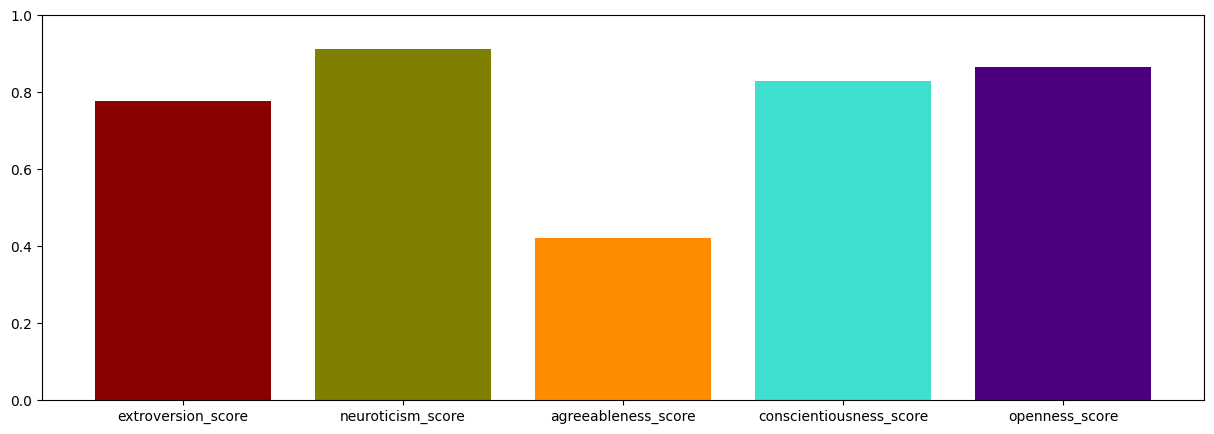

In [ ]:
# for cluster one

plt.figure(figsize= (15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['one'].keys()), normalized_all_types_scores['one'].values(), color=['darkred', 'olive', 'darkorange', 'turquoise', 'indigo'])
plt.show()

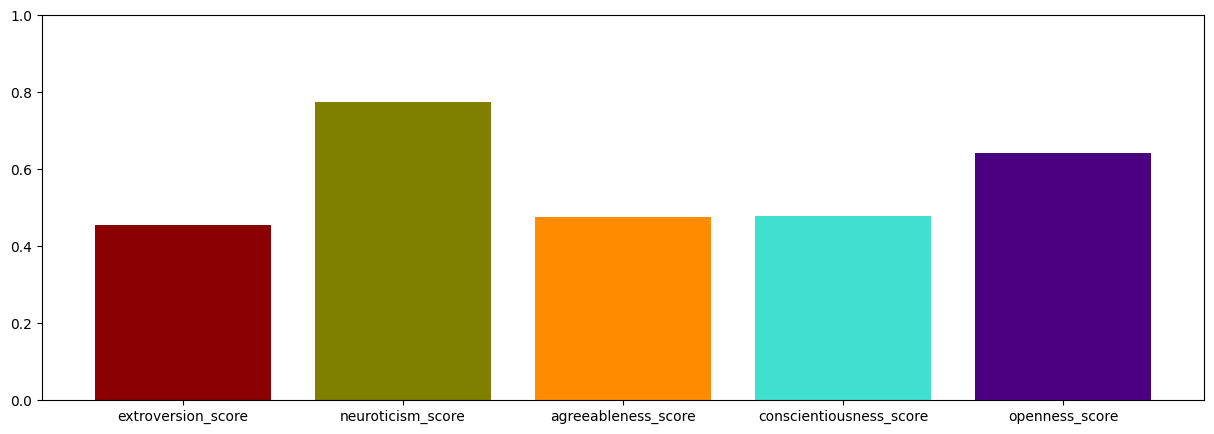

In [ ]:
# for cluster two

plt.figure(figsize= (15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['two'].keys()), normalized_all_types_scores['two'].values(), color=['darkred', 'olive', 'darkorange', 'turquoise', 'indigo'])
plt.show()

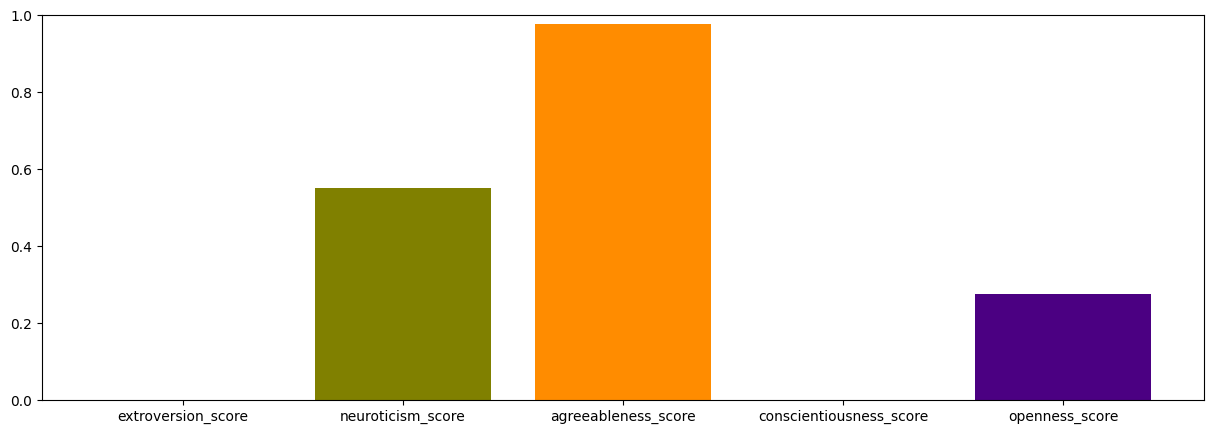

In [ ]:
# for cluster three

plt.figure(figsize= (15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['three'].keys()), normalized_all_types_scores['three'].values(), color=['darkred', 'olive', 'darkorange', 'turquoise', 'indigo'])
plt.show()

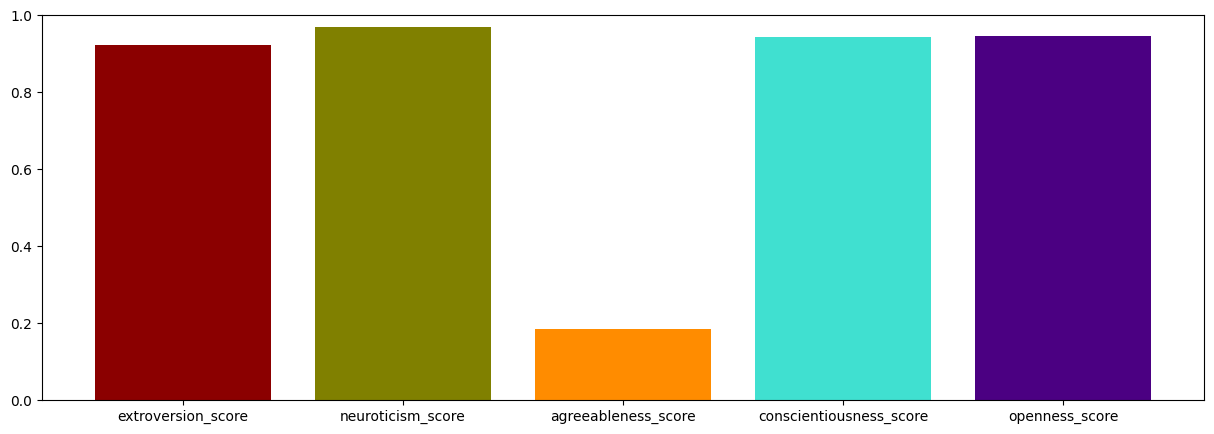

In [ ]:
# for cluster four

plt.figure(figsize= (15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['four'].keys()), normalized_all_types_scores['four'].values(), color=['darkred', 'olive', 'darkorange', 'turquoise', 'indigo'])
plt.show()

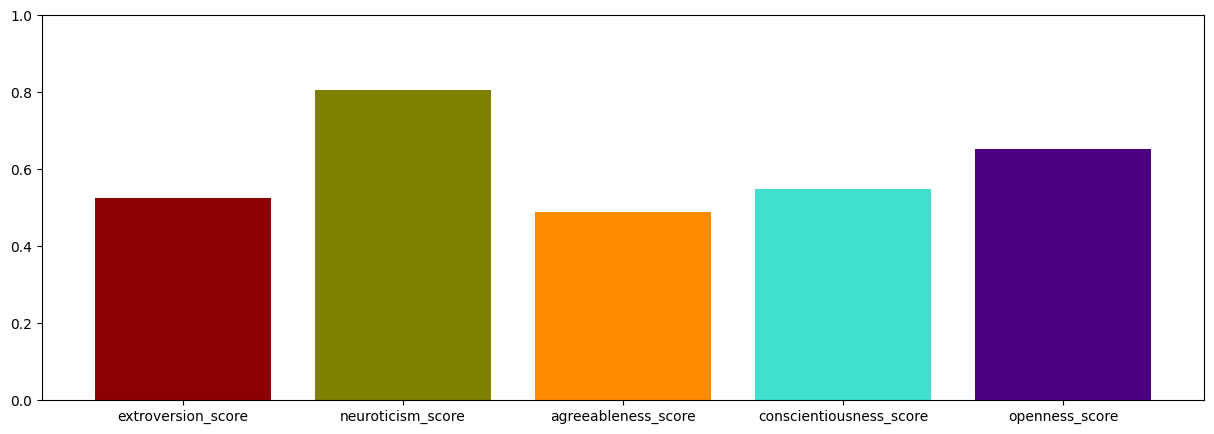

In [ ]:
# for cluster five

plt.figure(figsize= (15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['five'].keys()), normalized_all_types_scores['five'].values(), color=['darkred', 'olive', 'darkorange', 'turquoise', 'indigo'])
plt.show()

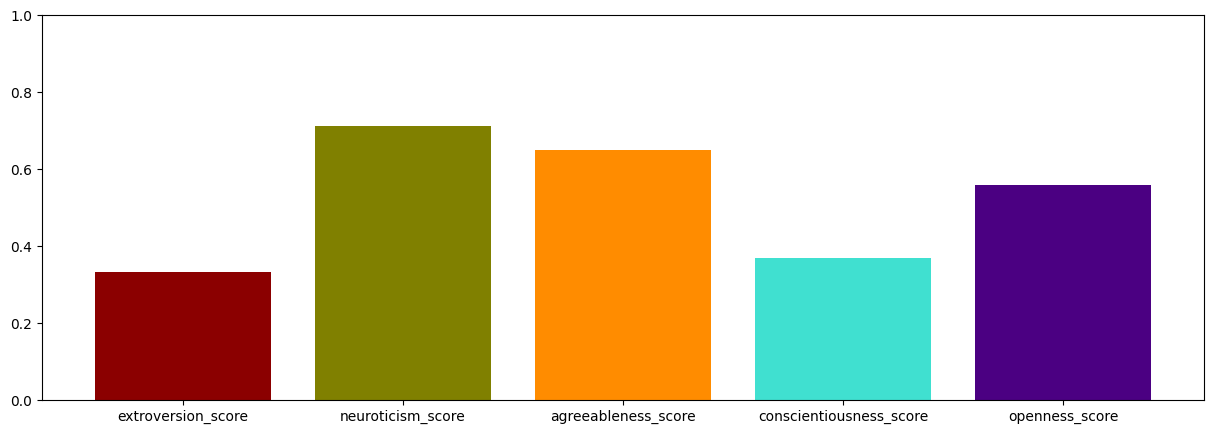

In [ ]:
# for cluster six

plt.figure(figsize= (15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['six'].keys()), normalized_all_types_scores['six'].values(), color=['darkred', 'olive', 'darkorange', 'turquoise', 'indigo'])
plt.show()

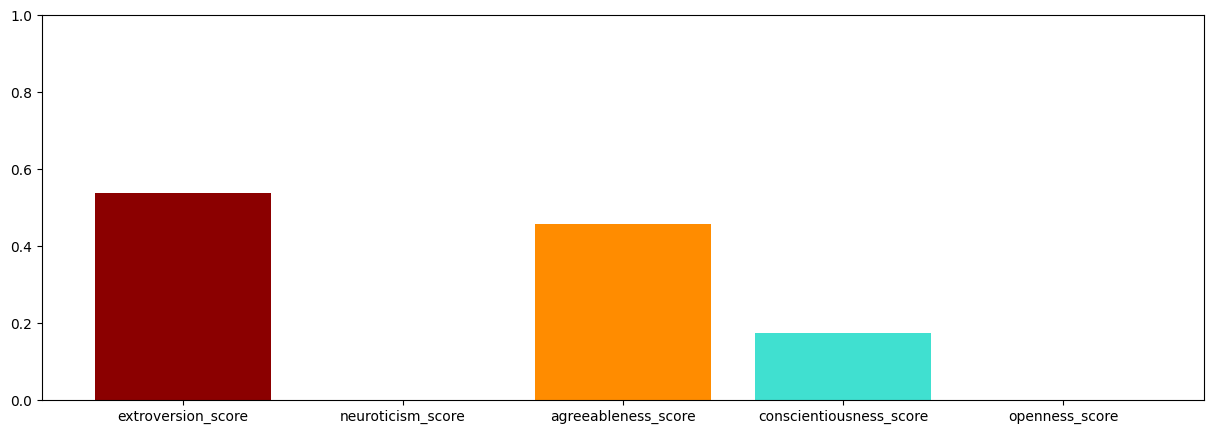

In [ ]:
# for cluster seven

plt.figure(figsize= (15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['seven'].keys()), normalized_all_types_scores['seven'].values(), color=['darkred', 'olive', 'darkorange', 'turquoise', 'indigo'])
plt.show()

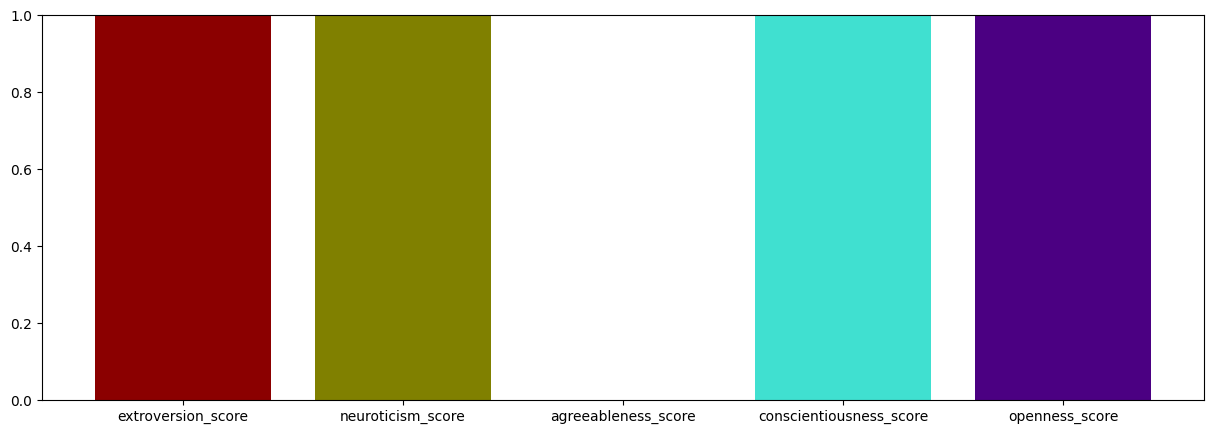

In [ ]:
# Testing the cluster eight
plt.figure(figsize= (15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['eight'].keys()), normalized_all_types_scores['eight'].values(), color=['darkred', 'olive', 'darkorange', 'turquoise', 'indigo'])
plt.show()

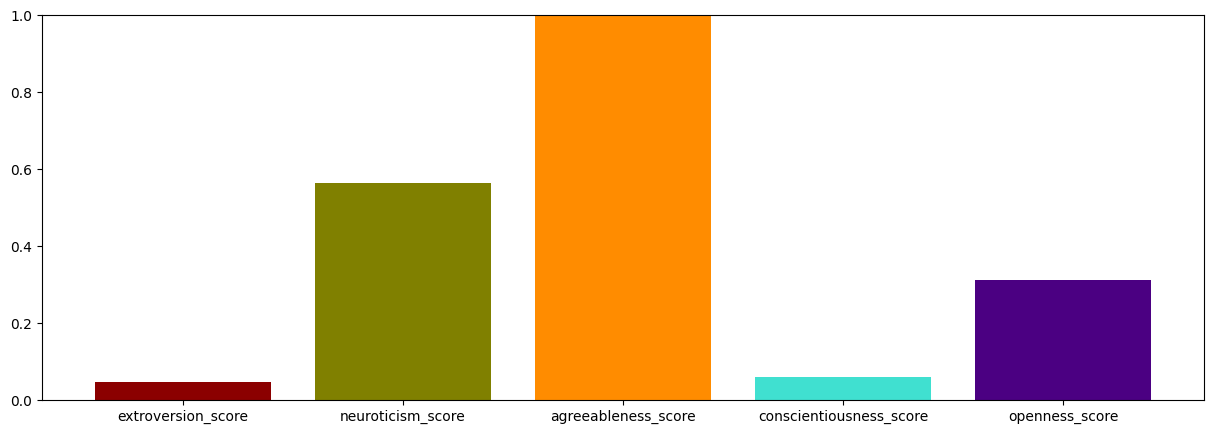

In [ ]:
# for cluster nine

plt.figure(figsize= (15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['nine'].keys()), normalized_all_types_scores['nine'].values(), color=['darkred', 'olive', 'darkorange', 'turquoise', 'indigo'])
plt.show()

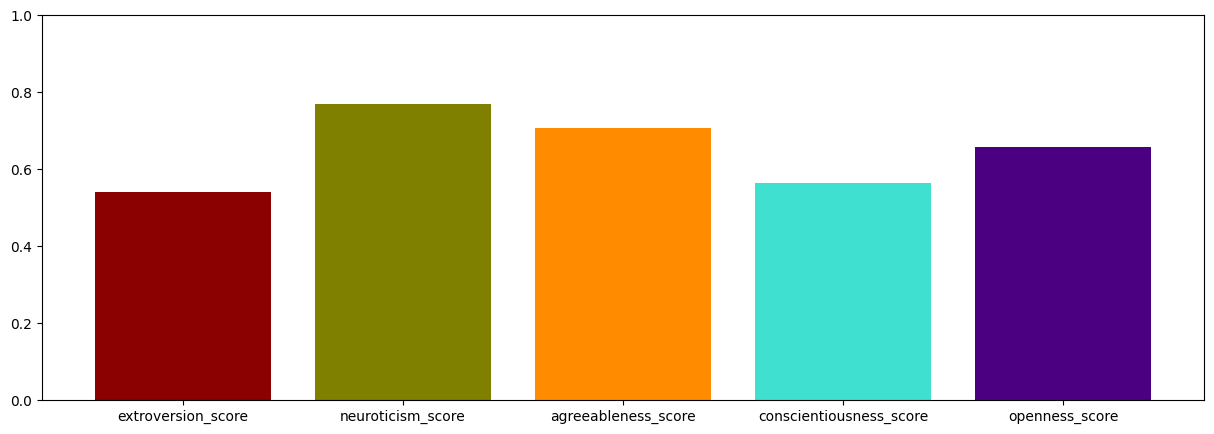

In [ ]:
# for cluster ten

plt.figure(figsize= (15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['ten'].keys()), normalized_all_types_scores['ten'].values(), color=['darkred', 'olive', 'darkorange', 'turquoise', 'indigo'])
plt.show()